# Prosper Loan Data Exploration
## by Jeffrey Van Anderson

## Preliminary Wrangling

**Introduction:**
> This document explores data from 113,936 loans from "Prosper" and an extensive 81 variables.  Univariate, bivariate and finally multivatiate visualizations are used as the primary exploritory tools here.  Additionally, only fifteen variables are used to address questionns in this exploration.

**Step 1:** First, all the necessary packages are imported and `*.csv` data file is imported as pandas dataframe

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#import *.csv file as pandas dataframe and display first five lines
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


**Step 2:** Next, information is displayed about the dataframe in order to become familiar with the data

In [3]:
#assess data types and dataframe shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

**Step 3:**  After briefly previewing the data, it is clear that there are excessive column variables to address in this one report.  A select few are queried and applied to a new dataframe for analysis.

In [4]:
#create list of collumns to keep for analysis
cols_to_keep = ['ListingKey', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ListingCategory (numeric)',
                'BorrowerState', 'EmploymentStatus', 'EmploymentStatusDuration',
                'IsBorrowerHomeowner', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment',
                'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years']

#assign queried collumns as df_trimmed variable
df_trimmed = df[cols_to_keep]

#confirm successful trim
df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
ListingKey                   113937 non-null object
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
EmploymentStatus             111682 non-null object
EmploymentStatusDuration     106312 non-null float64
IsBorrowerHomeowner          113937 non-null bool
StatedMonthlyIncome          113937 non-null float64
LoanOriginalAmount           113937 non-null int64
MonthlyLoanPayment           113937 non-null float64
CurrentDelinquencies         113240 non-null float64
AmountDelinquent             106315 non-null float64
DelinquenciesLast7Years      112947 non-null float64
dtypes: bool(1), float64(8), int64(2), object(4)
memory usage: 12.3+ MB


**Step 4:** With the separate dataframe, `df_trimmed` having fifteen columns, a few more functions can be applied to learn more about the data

In [5]:
#review distribution of data in variables
df_trimmed.describe()

,BorrowerAPR,BorrowerRate,ListingCategory (numeric),EmploymentStatusDuration,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years
count,113912.000000,113937.000000,113937.000000,106312.000000,1.139370e+05,113937.00000,113937.000000,113240.000000,106315.000000,112947.000000
mean,0.218828,0.192764,2.774209,96.071582,5.608026e+03,8337.01385,272.475783,0.592052,984.507059,4.154984
std,0.080364,0.074818,3.996797,94.480605,7.478497e+03,6245.80058,192.697812,1.978707,7158.270157,10.160216
min,0.006530,0.000000,0.000000,0.000000,0.000000e+00,1000.00000,0.000000,0.000000,0.000000,0.000000
25%,0.156290,0.134000,1.000000,26.000000,3.200333e+03,4000.00000,131.620000,0.000000,0.000000,0.000000
50%,0.209760,0.184000,1.000000,67.000000,4.666667e+03,6500.00000,217.740000,0.000000,0.000000,0.000000
75%,0.283810,0.250000,3.000000,137.000000,6.825000e+03,12000.00000,371.580000,0.000000,0.000000,3.000000
max,0.512290,0.497500,20.000000,755.000000,1.750003e+06,35000.00000,2251.510000,83.000000,463881.000000,99.000000


In [6]:
#view entries with null `AmountDelinquent` observations
df_trimmed[df_trimmed['AmountDelinquent'].isnull()].sample(5)

,ListingKey,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years
18591,B34C33691534698379B3921,Completed,0.27275,0.2615,0,NaN,Not available,NaN,False,2583.333333,1700,68.63,6.0,NaN,37.0
30755,31D833754015115759C114E,Completed,0.19108,0.1838,0,NaN,Not available,NaN,False,4666.666667,11500,417.95,1.0,NaN,6.0
26937,B69433765695148010F61AD,Completed,0.07961,0.0625,0,NaN,Not available,NaN,True,8666.666667,1000,30.54,1.0,NaN,0.0
102589,B0B53365043596359383752,Completed,0.09223,0.0750,0,NaN,NaN,NaN,False,7916.666667,1000,31.11,NaN,NaN,NaN
23074,AF3D336679043167935E105,Chargedoff,0.29776,0.2900,0,CA,Not available,NaN,False,4333.333333,3399,142.44,24.0,NaN,70.0


**Step 5:**  After inspection, there are a few more tidyness and cleanliness issues that need to be addressed as follows:
* `ListingCategory (numeric)` title needs to be shortened
* there is null data in a few columns
* some float datatypes should be changed to integer.
* the `LoanStatus` column should be ordered for clarity
* the `ListingCategory` column values should be replaced with strings to avoid unnecesssary referencing

In [7]:
#remove ' (numeric)' string from `ListingCategory`
df_trimmed = df_trimmed.rename(index=str, columns={"ListingCategory (numeric)": "ListingCategory"})
df_trimmed.head(1)

,ListingKey,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years
0,1021339766868145413AB3B,Completed,0.16516,0.158,0,CO,Self-employed,2.0,True,3083.333333,9425,330.43,2.0,472.0,4.0


In [8]:
#since the following column names have a lot of zeros and a sample of null `AmountDelinquent` observations have many other 
#null values, it is safe to drop these rows.

#create list of columns with nulls
nulls_todrop = ['AmountDelinquent', 'BorrowerState', 'EmploymentStatusDuration']

#drop row observalions where there are nulls in each specified column
for col in nulls_todrop:
    df_trimmed = df_trimmed[df_trimmed[col].notnull()]
    
#ensure success
df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104555 entries, 0 to 113936
Data columns (total 15 columns):
ListingKey                  104555 non-null object
LoanStatus                  104555 non-null object
BorrowerAPR                 104555 non-null float64
BorrowerRate                104555 non-null float64
ListingCategory             104555 non-null int64
BorrowerState               104555 non-null object
EmploymentStatus            104555 non-null object
EmploymentStatusDuration    104555 non-null float64
IsBorrowerHomeowner         104555 non-null bool
StatedMonthlyIncome         104555 non-null float64
LoanOriginalAmount          104555 non-null int64
MonthlyLoanPayment          104555 non-null float64
CurrentDelinquencies        104555 non-null float64
AmountDelinquent            104555 non-null float64
DelinquenciesLast7Years     104555 non-null float64
dtypes: bool(1), float64(8), int64(2), object(4)
memory usage: 12.1+ MB


In [9]:
df_trimmed.head()

,ListingKey,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years
0,1021339766868145413AB3B,Completed,0.16516,0.1580,0,CO,Self-employed,2.0,True,3083.333333,9425,330.43,2.0,472.0,4.0
1,10273602499503308B223C1,Current,0.12016,0.0920,2,CO,Employed,44.0,False,6125.000000,10000,318.93,0.0,0.0,0.0
3,0EF5356002482715299901A,Current,0.12528,0.0974,16,GA,Employed,113.0,True,2875.000000,10000,321.45,4.0,10056.0,14.0
4,0F023589499656230C5E3E2,Current,0.24614,0.2085,2,MN,Employed,44.0,True,9583.333333,15000,563.97,0.0,0.0,0.0
5,0F05359734824199381F61D,Current,0.15425,0.1314,1,NM,Employed,82.0,True,8333.333333,15000,342.37,0.0,0.0,0.0


In [10]:
#change float dtypes to integer for four columns
vars_to_int = ['EmploymentStatusDuration', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years']
for var in vars_to_int:
    df_trimmed[var] = df_trimmed[var].astype('int')

In [11]:
df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104555 entries, 0 to 113936
Data columns (total 15 columns):
ListingKey                  104555 non-null object
LoanStatus                  104555 non-null object
BorrowerAPR                 104555 non-null float64
BorrowerRate                104555 non-null float64
ListingCategory             104555 non-null int64
BorrowerState               104555 non-null object
EmploymentStatus            104555 non-null object
EmploymentStatusDuration    104555 non-null int32
IsBorrowerHomeowner         104555 non-null bool
StatedMonthlyIncome         104555 non-null float64
LoanOriginalAmount          104555 non-null int64
MonthlyLoanPayment          104555 non-null float64
CurrentDelinquencies        104555 non-null int32
AmountDelinquent            104555 non-null int32
DelinquenciesLast7Years     104555 non-null int32
dtypes: bool(1), float64(4), int32(4), int64(2), object(4)
memory usage: 10.5+ MB


In [12]:
#change `LoanStatus` to categorical ordered data type for interpretation
#first create ordered list
loan_stat_ord = ['Current', 'Cancelled', 'FinalPaymentInProgress', 'Completed', 'Past Due (1-15 days)',
                 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)',
                 'Past Due (91-120 days)', 'Past Due (>120 days', 'Chargedoff', 'Defaulted']

#then create an ordered catagorical datatype variable based on the list
loan_stat_var = pd.api.types.CategoricalDtype(ordered = True,
                                              categories = loan_stat_ord)

#then assign the `LoanStatus` column the datatype variable
df_trimmed['LoanStatus'] = df_trimmed['LoanStatus'].astype(loan_stat_var)

#confirm success
df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104555 entries, 0 to 113936
Data columns (total 15 columns):
ListingKey                  104555 non-null object
LoanStatus                  104539 non-null category
BorrowerAPR                 104555 non-null float64
BorrowerRate                104555 non-null float64
ListingCategory             104555 non-null int64
BorrowerState               104555 non-null object
EmploymentStatus            104555 non-null object
EmploymentStatusDuration    104555 non-null int32
IsBorrowerHomeowner         104555 non-null bool
StatedMonthlyIncome         104555 non-null float64
LoanOriginalAmount          104555 non-null int64
MonthlyLoanPayment          104555 non-null float64
CurrentDelinquencies        104555 non-null int32
AmountDelinquent            104555 non-null int32
DelinquenciesLast7Years     104555 non-null int32
dtypes: bool(1), category(1), float64(4), int32(4), int64(2), object(3)
memory usage: 9.8+ MB


In [13]:
#change `ListingCategory` from integer to category string
#first change dtype to string for iteration
df_trimmed['ListingCategory'] = df_trimmed['ListingCategory'].astype('str')

#assign dictionary of category name to number
cat_dict = {'0' : 'Not Available',
            '1' : 'Debt Consolidation',
            '2' : 'Home Improvement', 
            '3' : 'Business',
            '4' : 'Personal Loan',
            '5' : 'Student Use',
            '6' : 'Auto', 
            '7' : 'Other',
            '8' : 'Baby&Adoption',
            '9' : 'Boat',
            '10' : 'Cosmetic Procedure',
            '11' : 'Engagement Ring',
            '12' : 'Green Loans',
            '13' : 'Household Expenses', 
            '14' : 'Large Purchases',
            '15' : 'Medical/Dental',
            '16' : 'Motorcycle',
            '17' : 'RV',
            '18' : 'Taxes',
            '19' : 'Vacation',
            '20' : 'Wedding Loans'}

#loop over column and replace numbers with category strings
for num, string in cat_dict.items():
    df_trimmed['ListingCategory'] = df_trimmed['ListingCategory'].replace(num, string)

#confirm success
df_trimmed['ListingCategory'].value_counts()

Debt Consolidation    58279
Other                 10487
Not Available          7652
Home Improvement       7431
Business               7180
Auto                   2568
Personal Loan          2380
Household Expenses     1995
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           770
Vacation                768
Student Use             755
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

**Step 6:** Now that the data is wrangled, it is time to reflect on it prior to exploratory analysis.

### What is the structure of your dataset?

> After some trimming, tidying and wrangling the dataframe to be explored has considerably fewer columns than the original dataset; however, the number of rows are only slightly less since incomplete data was dropped.  There are fifteen columns in the resulting dataframe (14 variables and one key) and 104,555 rows or loan records with no null values.

> For the fourteen variable collumns, there are the following data types:
> * there are eight numeric columns (four ineger and four float)
> * the `LoanStatus` columns is ordered from no delinquency or `Current` to `Defaulted` later interpretation
> * there are three string or categorical columns for state, employment and listing category
> * finally, the `IsBorrowerHomeowner` column is a simple bool answer.

### What is/are the main feature(s) of interest in your dataset?

> Of primary interest is the relationship between loan status and the other thirteen variables attributed to the borrower.  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The `LoanStatus` column will directly be effected by `CurrentDelinquencies`; however, the `AmountDelinquent` and `DelinquenciesLast7Years` might have a different relationship.  Surely interest rates, emploment information will have a significant effect on LoanStatus, but they must be visually explored first.  Finally, it does not seam likely that `BorrowerState` or `ListingCategory` will be insightful at first, but there may be major differences depending on each state or category. 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [14]:
df_trimmed.head()

,ListingKey,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years
0,1021339766868145413AB3B,Completed,0.16516,0.1580,Not Available,CO,Self-employed,2,True,3083.333333,9425,330.43,2,472,4
1,10273602499503308B223C1,Current,0.12016,0.0920,Home Improvement,CO,Employed,44,False,6125.000000,10000,318.93,0,0,0
3,0EF5356002482715299901A,Current,0.12528,0.0974,Motorcycle,GA,Employed,113,True,2875.000000,10000,321.45,4,10056,14
4,0F023589499656230C5E3E2,Current,0.24614,0.2085,Home Improvement,MN,Employed,44,True,9583.333333,15000,563.97,0,0,0
5,0F05359734824199381F61D,Current,0.15425,0.1314,Debt Consolidation,NM,Employed,82,True,8333.333333,15000,342.37,0,0,0


**outline**

univariate:
* `LoanStatus` countplot (relative frequency)
* `BorrowerState` countplot
* `EmploymentStatus` countplot (relative frequency)
* `ListingCategory` count plot
* `LoanOriginalAmount` histogram
* `StatedMonthlyIncome` histogram

* `AmountDelinquent` histogram
* `CurrentDelinquencies` histogram
* `DelinquenciesLast7Years` histogram

bivariate:
* `LoanStatus` vs `BorrowerAPR` box plot
* `StatedMonthlyIncome` vs `MonthlyLoanPayment`
* `StatedMonthlyIncome` vs `loanStatus`


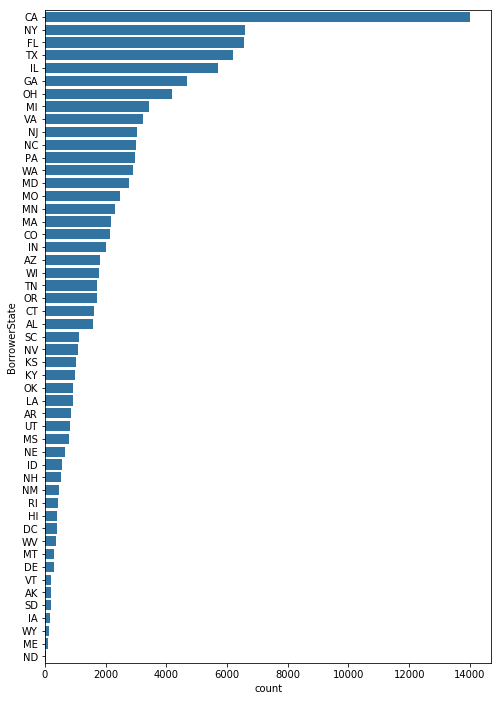

In [15]:
base_color = sns.color_palette()[0]

plt.figure(figsize=(8,12))
state_order = df_trimmed.BorrowerState.value_counts().index
sns.countplot(data = df_trimmed, y = 'BorrowerState', color = base_color, order = state_order)

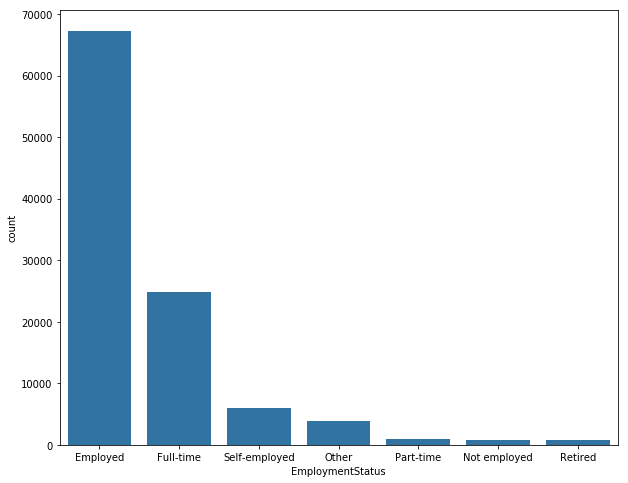

In [16]:
es_order = df_trimmed.EmploymentStatus.value_counts().index
plt.figure(figsize=(10,8))
sns.countplot(data = df_trimmed, x = 'EmploymentStatus', color = base_color, order = es_order);

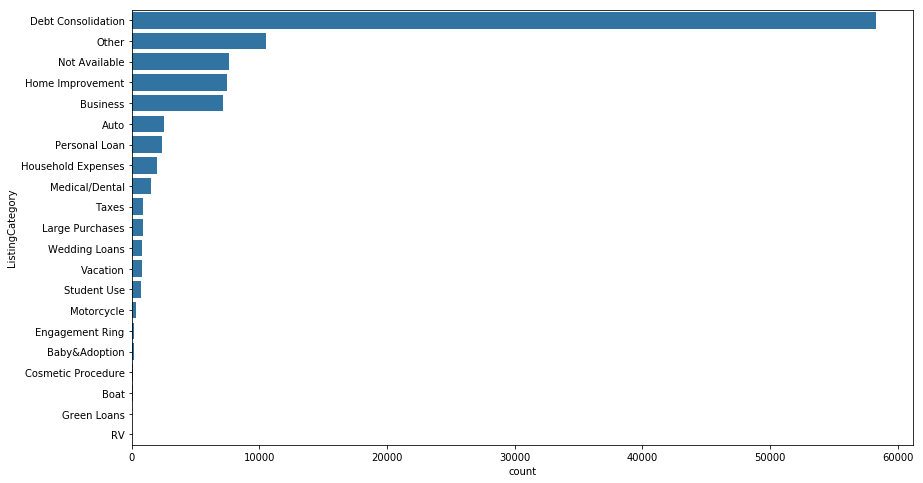

In [17]:
lc_order = df_trimmed.ListingCategory.value_counts().index

plt.figure(figsize=(14,8))
sns.countplot(data = df_trimmed, y = 'ListingCategory', color = base_color, order = lc_order);

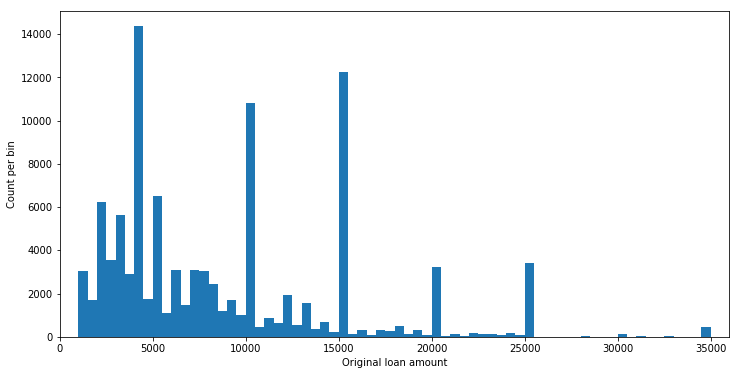

In [71]:
binsize = 500 
bins = np.arange(0, df_trimmed['LoanOriginalAmount'].max() + binsize, binsize)

plt.figure(figsize=(12,6))
plt.hist(data = df_trimmed, x = 'LoanOriginalAmount', bins = bins)
plt.xlim([0,36000])
plt.xlabel('Original loan amount')
plt.ylabel('Count per bin');

In [23]:
df_trimmed['StatedMonthlyIncome'].describe()

count    1.045550e+05
mean     5.689881e+03
std      7.647882e+03
min      0.000000e+00
25%      3.333333e+03
50%      4.766667e+03
75%      6.916667e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [42]:
non_outliers = []

mean = df_trimmed['StatedMonthlyIncome'].mean()
std = df_trimmed['StatedMonthlyIncome'].std()

for value in df_trimmed['StatedMonthlyIncome']:
    z_score = (value - mean) / std
    if np.abs(z_score) < 3:
        non_outliers.append(value)

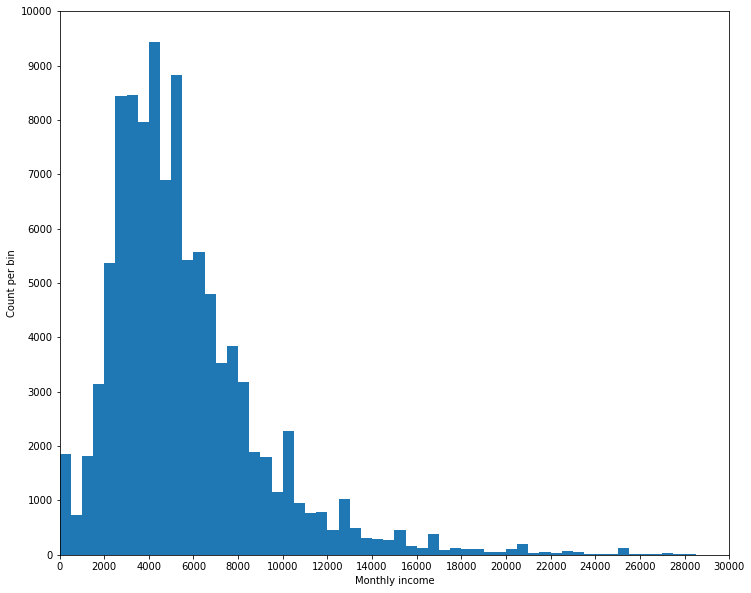

In [56]:
plt.figure(figsize=(12,10))
binsize = 500
bins = np.arange(0, np.max(non_outliers) + binsize, binsize)

plt.hist(data = df_trimmed, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Monthly income')
plt.ylabel('Count per bin')
plt.xlim([0,30001])
plt.xticks(np.arange(0, 30000+1, 2000))
plt.yticks(np.arange(0, 10000+1, 1000));

In [76]:
df_trimmed['AmountDelinquent'].describe()

count    104555.000000
mean        973.215064
std        7156.931969
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      463881.000000
Name: AmountDelinquent, dtype: float64

In [79]:
non_outliers = []

mean = df_trimmed['AmountDelinquent'].mean()
std = df_trimmed['AmountDelinquent'].std()

for value in df_trimmed['AmountDelinquent']:
    z_score = (value - mean) / std
    if np.abs(z_score) < 3:
        non_outliers.append(value)

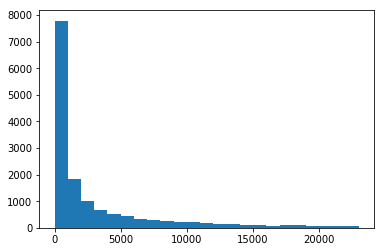

In [83]:

binsize = 1000
bins = np.arange(1, np.max(non_outliers) + binsize, binsize)

plt.hist(data = df_trimmed, x = 'AmountDelinquent', bins = bins);

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!